# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in self.scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in self.scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


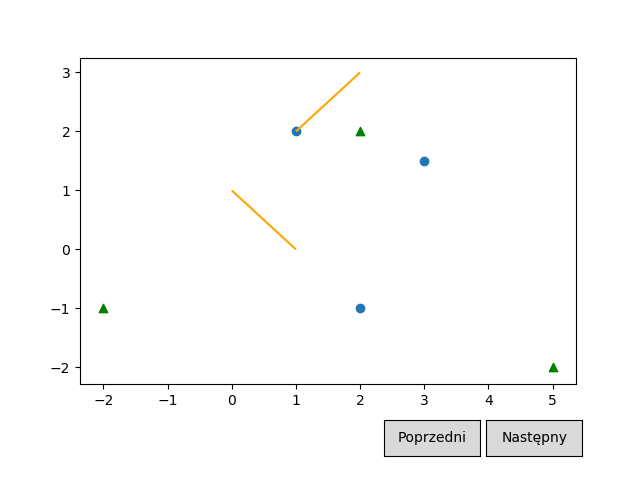

In [3]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

<IPython.core.display.Javascript object>


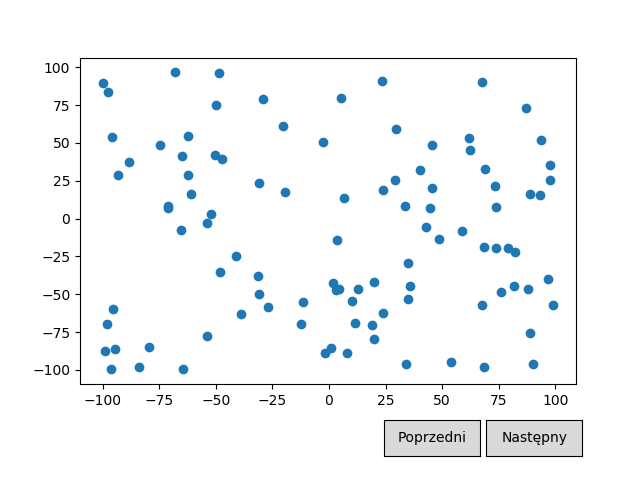

In [4]:
import random

%matplotlib notebook

def losa(n=100, l=-100, r=100):
    pkta=[]
    h=r-l
    m=(r+l)/2
    for i in range(n):
        pkta.append((random.random()*h-h/2+m, random.random()*h-h/2+m))
        #pkta.append((random.random()*2*(1e2)-1e2, random.random()*2*(1e2)-1e2))

    return pkta

pkta = losa()
scenes = [Scene([PointsCollection(pkta)])]
plot = Plot(scenes)
plot.draw()


<IPython.core.display.Javascript object>


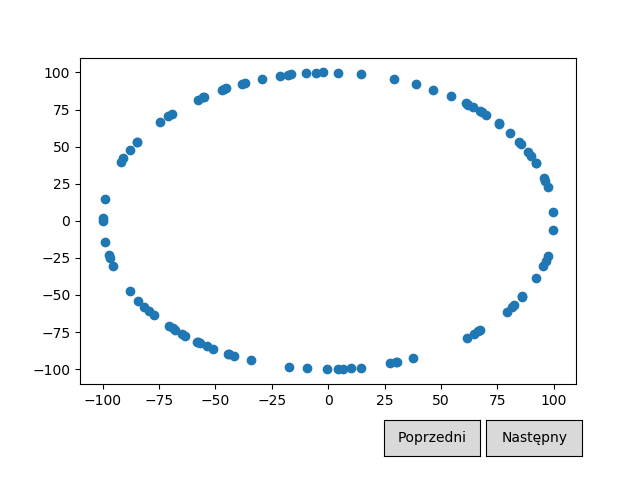

In [25]:
%matplotlib notebook

import math

def losb(n=100, m=(0,0), r=100):
    pktb=[]
    for i in range(n):
        a = 2*math.pi*random.random()
        pktb.append((r*math.cos(a)+m[0], r*math.sin(a)+m[1]))

    return pktb
    
pktb = losb()
scenes = [Scene([PointsCollection(pktb)])]
plot = Plot(scenes)
plot.draw()


<IPython.core.display.Javascript object>


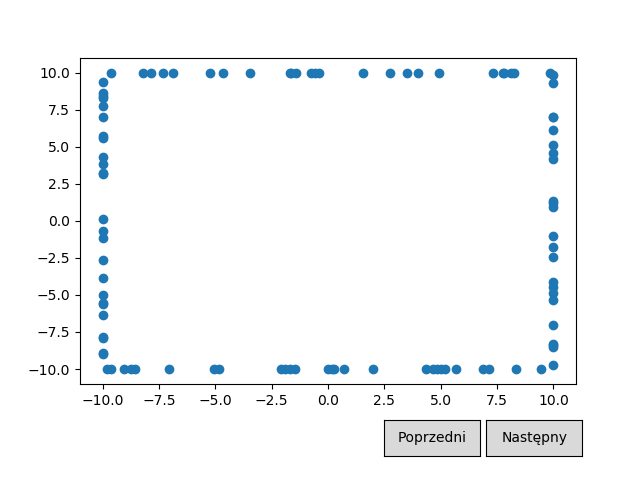

In [24]:
%matplotlib notebook

import math

def losc(n=100, a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10)):
    pktc=[]
    
    _x=a[0]-b[0]
    _y=a[1]-b[1]
    v1=(_x, _y)
    _x=b[0]-c[0]
    _y=b[1]-c[1]
    v2=(_x, _y)
    
    for i in range(n):
        r=random.randrange(4)
        x=random.random()
        if r%2==0:
            if r==0:
                pktc.append((b[0]+v1[0]*x,b[1]+v1[1]*x))
            else:
                pktc.append((c[0]+v1[0]*x,c[1]+v1[1]*x))
        else:
            if r==1:
                pktc.append((c[0]+v2[0]*x,c[1]+v2[1]*x))
            else:
                pktc.append((d[0]+v2[0]*x,d[1]+v2[1]*x))

    return pktc

pktc = losc()
scenes = [Scene([PointsCollection(pktc)])]
plot = Plot(scenes)
plot.draw()


<IPython.core.display.Javascript object>


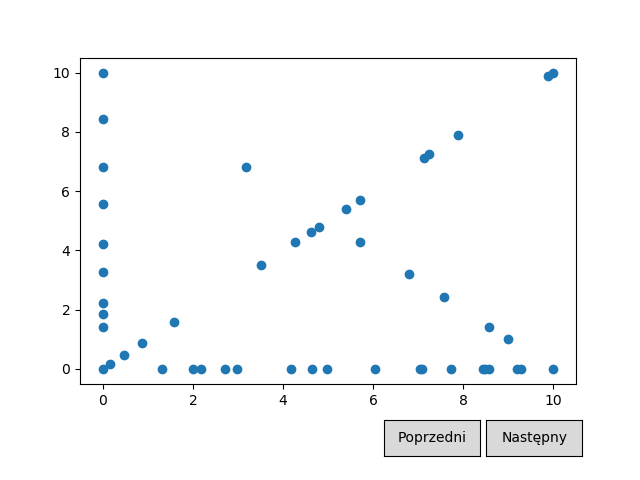

In [12]:

%matplotlib notebook

import math

def losd(a=(0,0), b=(10, 0), c=(10, 10), d=(0,10), n=25, m=20):
    pktd=[]
    
    pktd.append(a)
    pktd.append(b)
    pktd.append(c)
    pktd.append(d)
    
    x=max(c[0], c[1], d[0], d[1])
    
    for i in range(n):
        tmp=random.random()*x
        r=random.randrange(2)
        if r==0:
            pktd.append((0, tmp))
        elif r==1:
            pktd.append((tmp, 0))

    for i in range(m):
        tmp=random.random()*x
        r=random.randrange(2)
        if r==0:
            pktd.append((tmp, tmp))
        elif r==1:
            pktd.append((tmp, x-tmp))
    
    return pktd

pktd = losd()
scenes = [Scene([PointsCollection(pktd)])]
plot = Plot(scenes)
plot.draw()


In [6]:
import numpy.linalg

eps=1e-11

def det(a, b, c): #>0 to lewa, <0 to prawa
    d=a[0]*b[1]+b[0]*c[1]+c[0]*a[1]-c[0]*b[1]-b[0]*a[1]-a[0]*c[1]
    return d

def quicksort(x, low):
    if len(x) < 2:
        return x
    else:
        pivot = x[0]
        less = [i for i in x[1:] if det(i, low, pivot)<-eps]#i <= pivot]
        greater = [i for i in x[1:] if det(i, low, pivot)>eps]#i > pivot]
        eq = [i for i in x[1:] if abs(det(i, low, pivot))<=eps]
        eq.append(pivot)
        pivot = max(eq, key = lambda p: (abs(p[0]-low[0]), abs(p[1]-low[1])))
        return quicksort(less, low) + [pivot] + quicksort(greater, low)

def angsort(tab):
    mi = min(tab, key = lambda x: (x[1], x[0]))
    tab.remove(mi)
    res = [mi] + quicksort(tab, mi)
    tab.append(mi)
    return res

In [7]:
%matplotlib notebook

def Graham(tab, scenes=[]):
    pkt=tab[:]
    pkt=angsort(pkt)
    conv=[]
    conv=[pkt[0], pkt[1]]
    for i in pkt[2:]:
        druk=[]
        for o in range(len(conv)-1):
            druk.append([conv[o], conv[o+1]])
        
        scenes.append(Scene([PointsCollection(pkt), PointsCollection(conv, 'Red', marker='x'), PointsCollection([i], 'Pink', marker='o')], [LinesCollection(druk, 'Green'), LinesCollection([[conv[-1], i]], 'Purple')]))
        
        #scenes.append(Scene([PointsCollection(pkt), PointsCollection(conv, 'Red', marker='x'), PointsCollection([i], 'Pink', marker='o')]))#, [LinesCollection([conv], 'Green')]))
        #, [LinesCollection([conv[:-2]], 'Red'), LinesCollection([conv[-2:]+[i]], 'Black')]))
        d = det(conv[-2], conv[-1], i)
        while len(conv)>1 and det(conv[-2], conv[-1], i)<-eps:
            del conv[-1]
        while len(conv)>1 and det(conv[-2], conv[-1], i)<eps:#współliniowe
            del conv[-1]
        conv.append(i)
    
    return conv
            

<IPython.core.display.Javascript object>


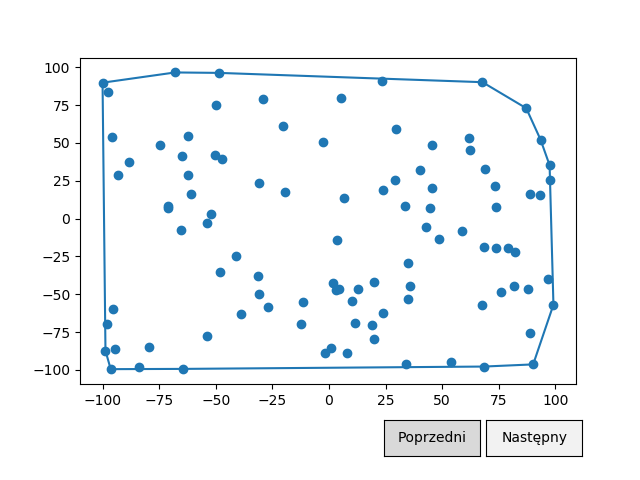

In [14]:
#def testGraham():
%matplotlib notebook


#pkt=[(-1, -1), (1, -1), (1, 1), (-1, 1), (0.5, 0.5)]
pkt = pkta
scenes=[]

conv = Graham(pkt, scenes)
conv.append(conv[0])

scenes = scenes + [Scene([PointsCollection(pkt)], [LinesCollection([conv])])]
plot = Plot(scenes)
plot.draw()
    
#testGraham()

In [17]:
def Jarvis(pkt, scenes=[]):
    conv=[]
    
    ob = min(pkt)#pkt[0]
    i=0
    while True:
        conv.append(ob)
        #print(conv)
        tmp = pkt[0]
        
        for x in pkt[1:]:
            druk=[]
            for o in range(len(conv)-1):
                druk.append([conv[o], conv[o+1]])
        
            scenes.append(Scene([PointsCollection(pkt), PointsCollection(conv, 'Red', marker='x'), PointsCollection([tmp], 'Pink', marker='o'), PointsCollection([x], 'Yellow', marker='.')], [LinesCollection(druk, 'Green'), LinesCollection([[conv[-1], tmp], [tmp, x]], 'Purple')]))
        
            
            #scenes.append(Scene([PointsCollection(pkt), PointsCollection(conv, 'Red', marker='x'), PointsCollection([x], 'Pink', marker='o')]))#, [LinesCollection([conv], 'Green')]))
            if ob == x:
                continue
            elif tmp == ob or det(ob, tmp, x) < eps:
                tmp = x
            elif det(ob, tmp, x) <= eps:
                len1=(tmp[0]-ob[0])**2 + (tmp[1]-ob[1])**2
                len2=(x[0]-ob[0])**2 + (x[1]-ob[1])**2
                if len2>len1:
                    tmp = x
        #print(ob, tmp)
        #i = (i+1)%len(pkt)
        ob = tmp
        if ob == conv[0]:
            break
    
    return conv

<IPython.core.display.Javascript object>


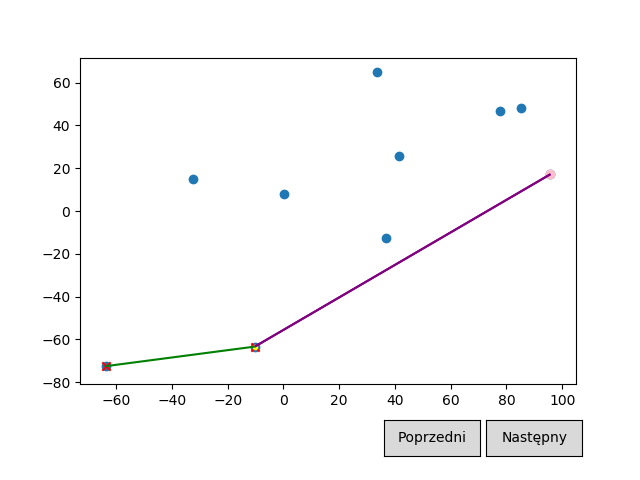

In [19]:
#def testJar():
%matplotlib notebook

#pkt = [(-1, -1), (1, -1), (1, 1), (-1, 1), (0.5, 0.5)]
#pkt=pkta
pkt=losa(10)

scenes=[]
conv = Jarvis(pkt, scenes)
conv.append(conv[0])

scenes = scenes +[Scene([PointsCollection(pkt)], [LinesCollection([conv])])]
plot = Plot(scenes)
plot.draw()

#testJar()
    

In [20]:
def solve(tab, alg=0):# alg=0 Graham, alg=1 Jarvis, returns [Scene]
    scenes = []
    pkt = tab[:]
    if alg==0:
        
        conv = Graham(pkt, [])
                      
            
        #np.savetxt("inc.txt", np.array(tab), fmt="%s")
        #np.savetxt("outc.txt", np.array(conv), fmt="%s")
        
        conv.append(conv[0])
        for i in conv[1:]:
            pkt.remove(i)
        scenes = [Scene([PointsCollection(pkt), PointsCollection(conv, 'Red', marker='x')], [LinesCollection([conv], 'Green')])]
    else:
        conv = Jarvis(pkt, [])
        
        #np.savetxt("ind.txt", np.array(tab), fmt="%s")

        #np.savetxt("outd.txt", np.array(conv), fmt="%s")
        
        conv.append(conv[0])
        for i in conv[1:]:
            pkt.remove(i)
        scenes = [Scene([PointsCollection(pkt), PointsCollection(conv, 'Black', marker='x')], [LinesCollection([conv], 'Red')])]
    
    
    return scenes

In [21]:
import time

def comp(pkt):
    scene1 = []
    scene2 = []
    start_time = time.time()
    scene1 = solve(pkt, 0)
    print("--- %s seconds for Graham's ---" % (time.time() - start_time))

    start_time = time.time()
    scene2 = solve(pkt, 1)
    print("--- %s seconds for Jarvis'---" % (time.time() - start_time))
    return scene1+scene2

--- 0.01680469512939453 seconds for Graham's ---
--- 1.684225082397461 seconds for Jarvis'---


<IPython.core.display.Javascript object>


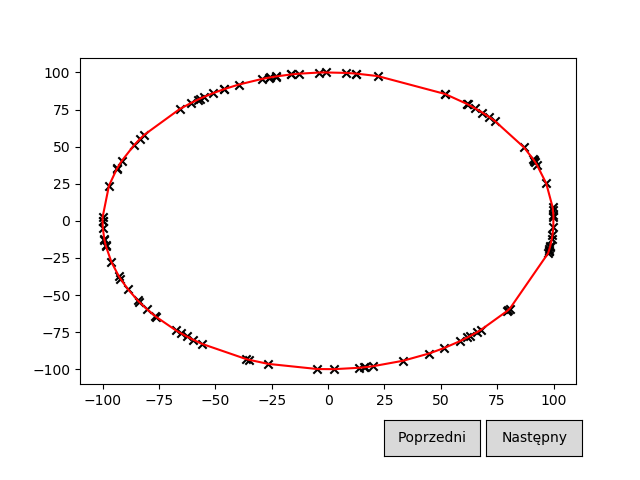

In [26]:
%matplotlib notebook

#pkt = [(-1, -1), (1, -1), (1, 1), (-1, 1), (0.5, 0.5), (0, -1), (0, 1), (1, 0), (-1, 0)]
#pkt = losa(n=10000, l=-100, r=100)
#pkt = losb(n=1000, m=(0,0), r=100)
#pkt = losc(n=10000, a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10))
#pkt = losd(a=(0,0), b=(10, 0), c=(10, 10), d=(0,10), n=25000, m=20000)
#pkt = losa()
pkt = losb()
#pkt = losc()
#pkt = losd()

scenes = comp(pkt)
plot = Plot(scenes)
plot.draw()
